<a href="https://colab.research.google.com/github/sanketpatil51/Milling_Machine/blob/main/milling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Choose the file from your local machine
uploaded = files.upload()

# Move the uploaded file to the required directory
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d stephanmatzka/predictive-maintenance-dataset-ai4i-2020

  0% 0.00/136k [00:00<?, ?B/s]
100% 136k/136k [00:00<00:00, 14.8MB/s]


In [ ]:
!unzip predictive-maintenance-dataset-ai4i-2020 .zip


Archive:  predictive-maintenance-dataset-ai4i-2020.zip
caution: filename not matched:  .zip


In [ ]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv('/content/predictive-maintenance-dataset-ai4i-2020.zip')


In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:

df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<Axes: >

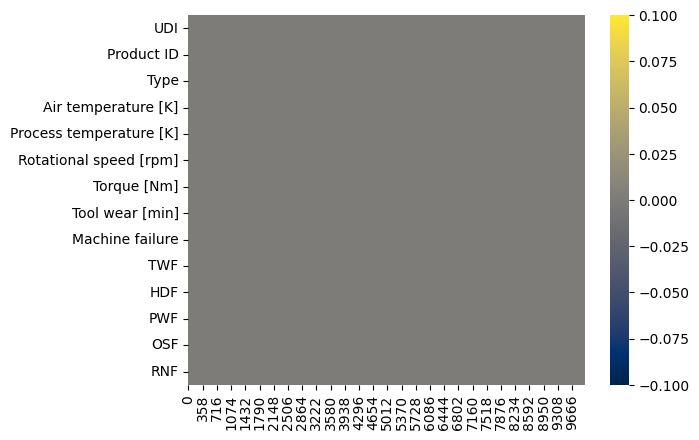

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isna().transpose(),cmap='cividis')

## Conclusion:From the above heatmap we can cleary seen that there is no missing value in data set.

<ipython-input-171-852aad851af7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

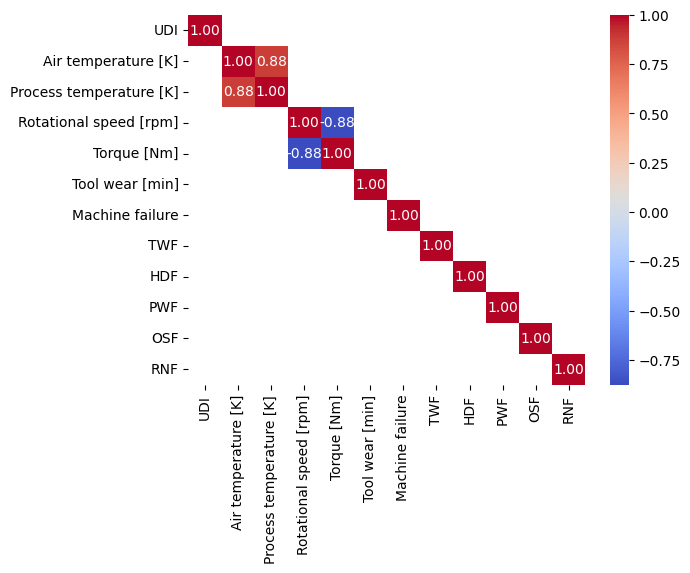

In [ ]:
correlation_matrix = df.corr()

# Create a mask to display only values greater than 0.7
mask = abs(correlation_matrix )> 0.6

# Create a heatmap
sns.heatmap(correlation_matrix[mask], annot=True, cmap='coolwarm', fmt='.2f')

## Conclusion: Based on the heatmap presented above, it is evident that there is a strong correlation between Process temperature [K], Rotational speed [rpm], and Torque [Nm]. However, since Air temperature [K] and Process temperature [K] are closely related terms, we have decided to exclude Air temperature [K] from further analysis. Rotational speed [rpm] and Torque [Nm] remain relevant as distinct variables.

In [ ]:
df.drop(['UDI','Product ID',"Air temperature [K]"],axis=1,inplace=True)


In [ ]:
features = list(df.columns)
features

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

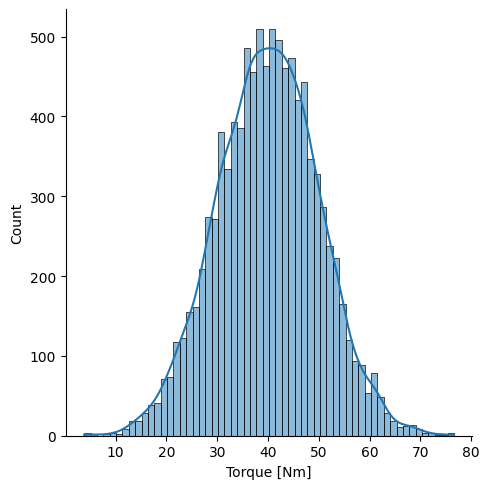

In [ ]:
sns.displot(df["Torque [Nm]"], kde=True)

##Conclusion: Generaly Torque [Nm] apply on machine is lies between 10 to 70 [NM].

<Axes: ylabel='Tool wear [min]'>

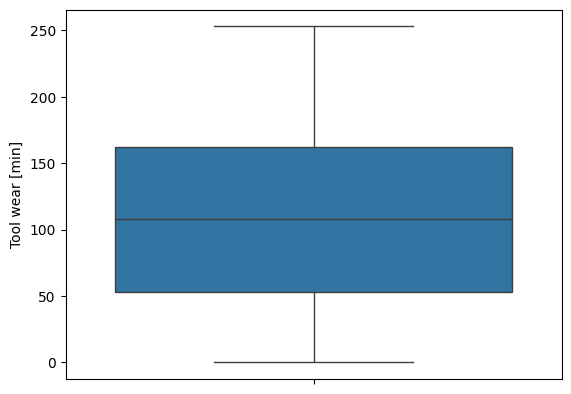

In [ ]:
sns.boxplot(df['Tool wear [min]'])

## Conclusion: Generaly Tool wear replaced in between 50 to 150.

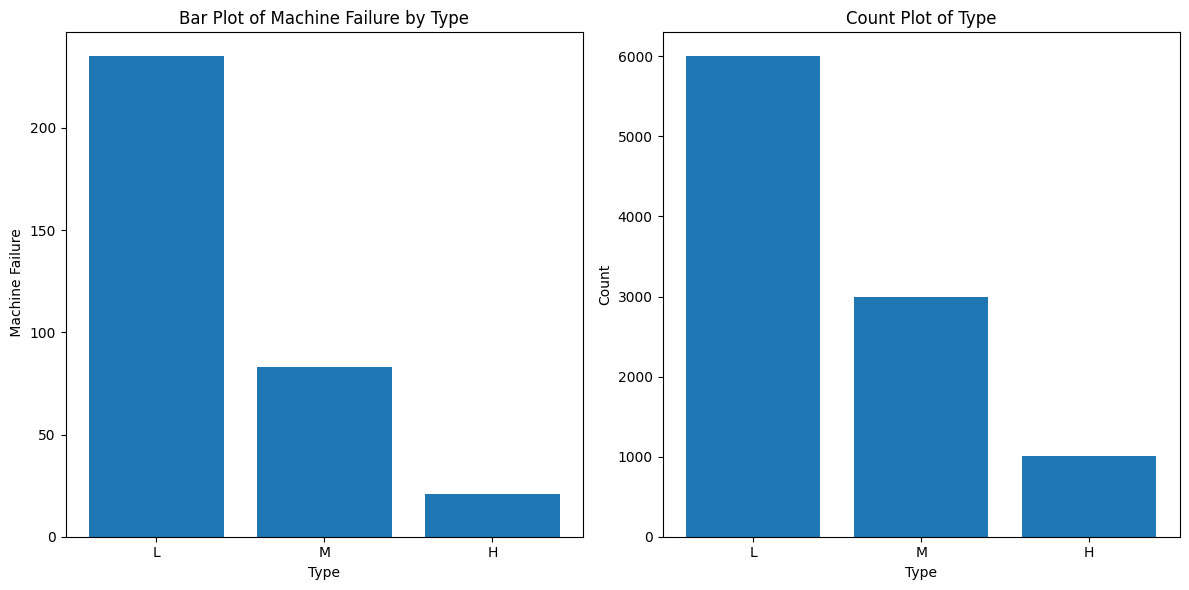

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

df1 = df[df["Machine failure"] == 1]
failure_by_type=df1["Type"].value_counts()
axes[0].bar(failure_by_type.index, failure_by_type.values)
axes[0].set_title("Bar Plot of Machine Failure by Type")
axes[0].set_xlabel("Type")
axes[0].set_ylabel(" Machine Failure")

# Count plot using plt.bar for count of types
type_counts = df["Type"].value_counts()
axes[1].bar(type_counts.index, type_counts.values)
axes[1].set_title("Count Plot of Type")
axes[1].set_xlabel("Type")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



## Conclusion: The comparison of the two graphs reveals a clear similarity between the proportion of machine failures  by type and the corresponding use of of tool wear types.







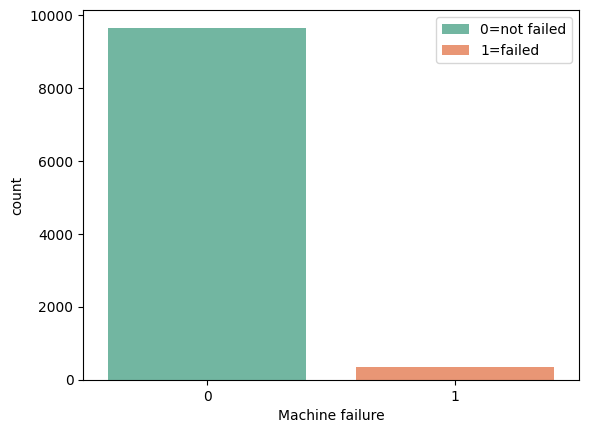

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Machine failure'],hue=df['Machine failure'],palette="Set2")
plt.legend(labels=["0=not failed", "1=failed"])
plt.show()

## Conclusion: The graph above clearly illustrates that the data is imbalanced, indicating a need for balancing methods to address this issue.

In [ ]:
import numpy as np
import pandas as pd

# Assuming df is your original DataFrame
# df1 contains rows where "Machine failure" is 1, df0 contains rows where "Machine failure" is 0
df1 = df[df["Machine failure"] == 1]
df0 = df[df["Machine failure"] == 0]

# Generate random indices for sampling from df0
sm = np.random.choice(np.arange(len(df0)), size=len(df1), replace=False)

# Sample from df0 based on the random indices
sdf0 = df0.iloc[sm]

# Concatenate sdf0 and df1
ndata = pd.concat([sdf0, df1], ignore_index=True)




In [ ]:
ndata = pd.get_dummies(ndata)
ndata

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,310.9,1542,36.7,101,0,0,0,0,0,0,0,1,0
1,309.3,1499,36.8,88,0,0,0,0,0,0,0,0,1
2,310.8,1571,38.2,74,0,0,0,0,0,0,0,1,0
3,313.0,1482,38.5,82,0,0,0,0,0,0,0,1,0
4,312.7,1461,38.2,188,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,309.8,2271,16.2,218,1,1,0,0,0,0,0,1,0
674,309.5,1294,66.7,12,1,0,0,1,0,0,0,1,0
675,309.4,1360,60.9,187,1,0,0,0,1,0,0,1,0
676,309.3,1337,56.1,206,1,0,0,0,1,0,0,1,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Assuming you have a target variable named "target_column" in ndata
X = ndata.drop(columns=["Machine failure"])  # Features
y = ndata["Machine failure"]  # Target

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [ ]:
print(np.shape(X_test))
print(np.shape(y_test))


(136, 12)
(136,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9779411764705882
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.97      0.99      0.98        71

    accuracy                           0.98       136
   macro avg       0.98      0.98      0.98       136
weighted avg       0.98      0.98      0.98       136



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9926470588235294
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.99      0.99        71

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense



# Initialize the ANN model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(units=500, activation='relu', input_dim=X_train.shape[1]))

# Add the second hidden layer
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1)

# Predict on the testing data
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy_ann)

# Print classification report
print("ANN Classification Report:")
print(classification_report(y_test, y_pred_ann))


Epoch 1/100
11/11 [==============================] - 2s 23ms/step - loss: 33.4336 - accuracy: 0.4539
Epoch 2/100
11/11 [==============================] - 0s 23ms/step - loss: 11.1300 - accuracy: 0.4852
Epoch 3/100
11/11 [==============================] - 0s 31ms/step - loss: 5.4674 - accuracy: 0.4945
Epoch 4/100
11/11 [==============================] - 0s 26ms/step - loss: 1.0939 - accuracy: 0.5517
Epoch 5/100
11/11 [==============================] - 0s 27ms/step - loss: 0.6809 - accuracy: 0.6365
Epoch 6/100
11/11 [==============================] - 0s 21ms/step - loss: 0.6338 - accuracy: 0.6661
Epoch 7/100
11/11 [==============================] - 0s 21ms/step - loss: 0.7318 - accuracy: 0.5775
Epoch 8/100
11/11 [==============================] - 0s 19ms/step - loss: 0.7720 - accuracy: 0.5978
Epoch 9/100
11/11 [==============================] - 0s 19ms/step - loss: 0.5956 - accuracy: 0.6790
Epoch 10/100
11/11 [==============================] - 0s 21ms/step - loss: 0.5690 - accuracy: 0.70

Pruned Decision Tree Accuracy: 0.8970588235294118
Pruned Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91        76
           1       0.86      0.92      0.89        60

    accuracy                           0.90       136
   macro avg       0.89      0.90      0.90       136
weighted avg       0.90      0.90      0.90       136



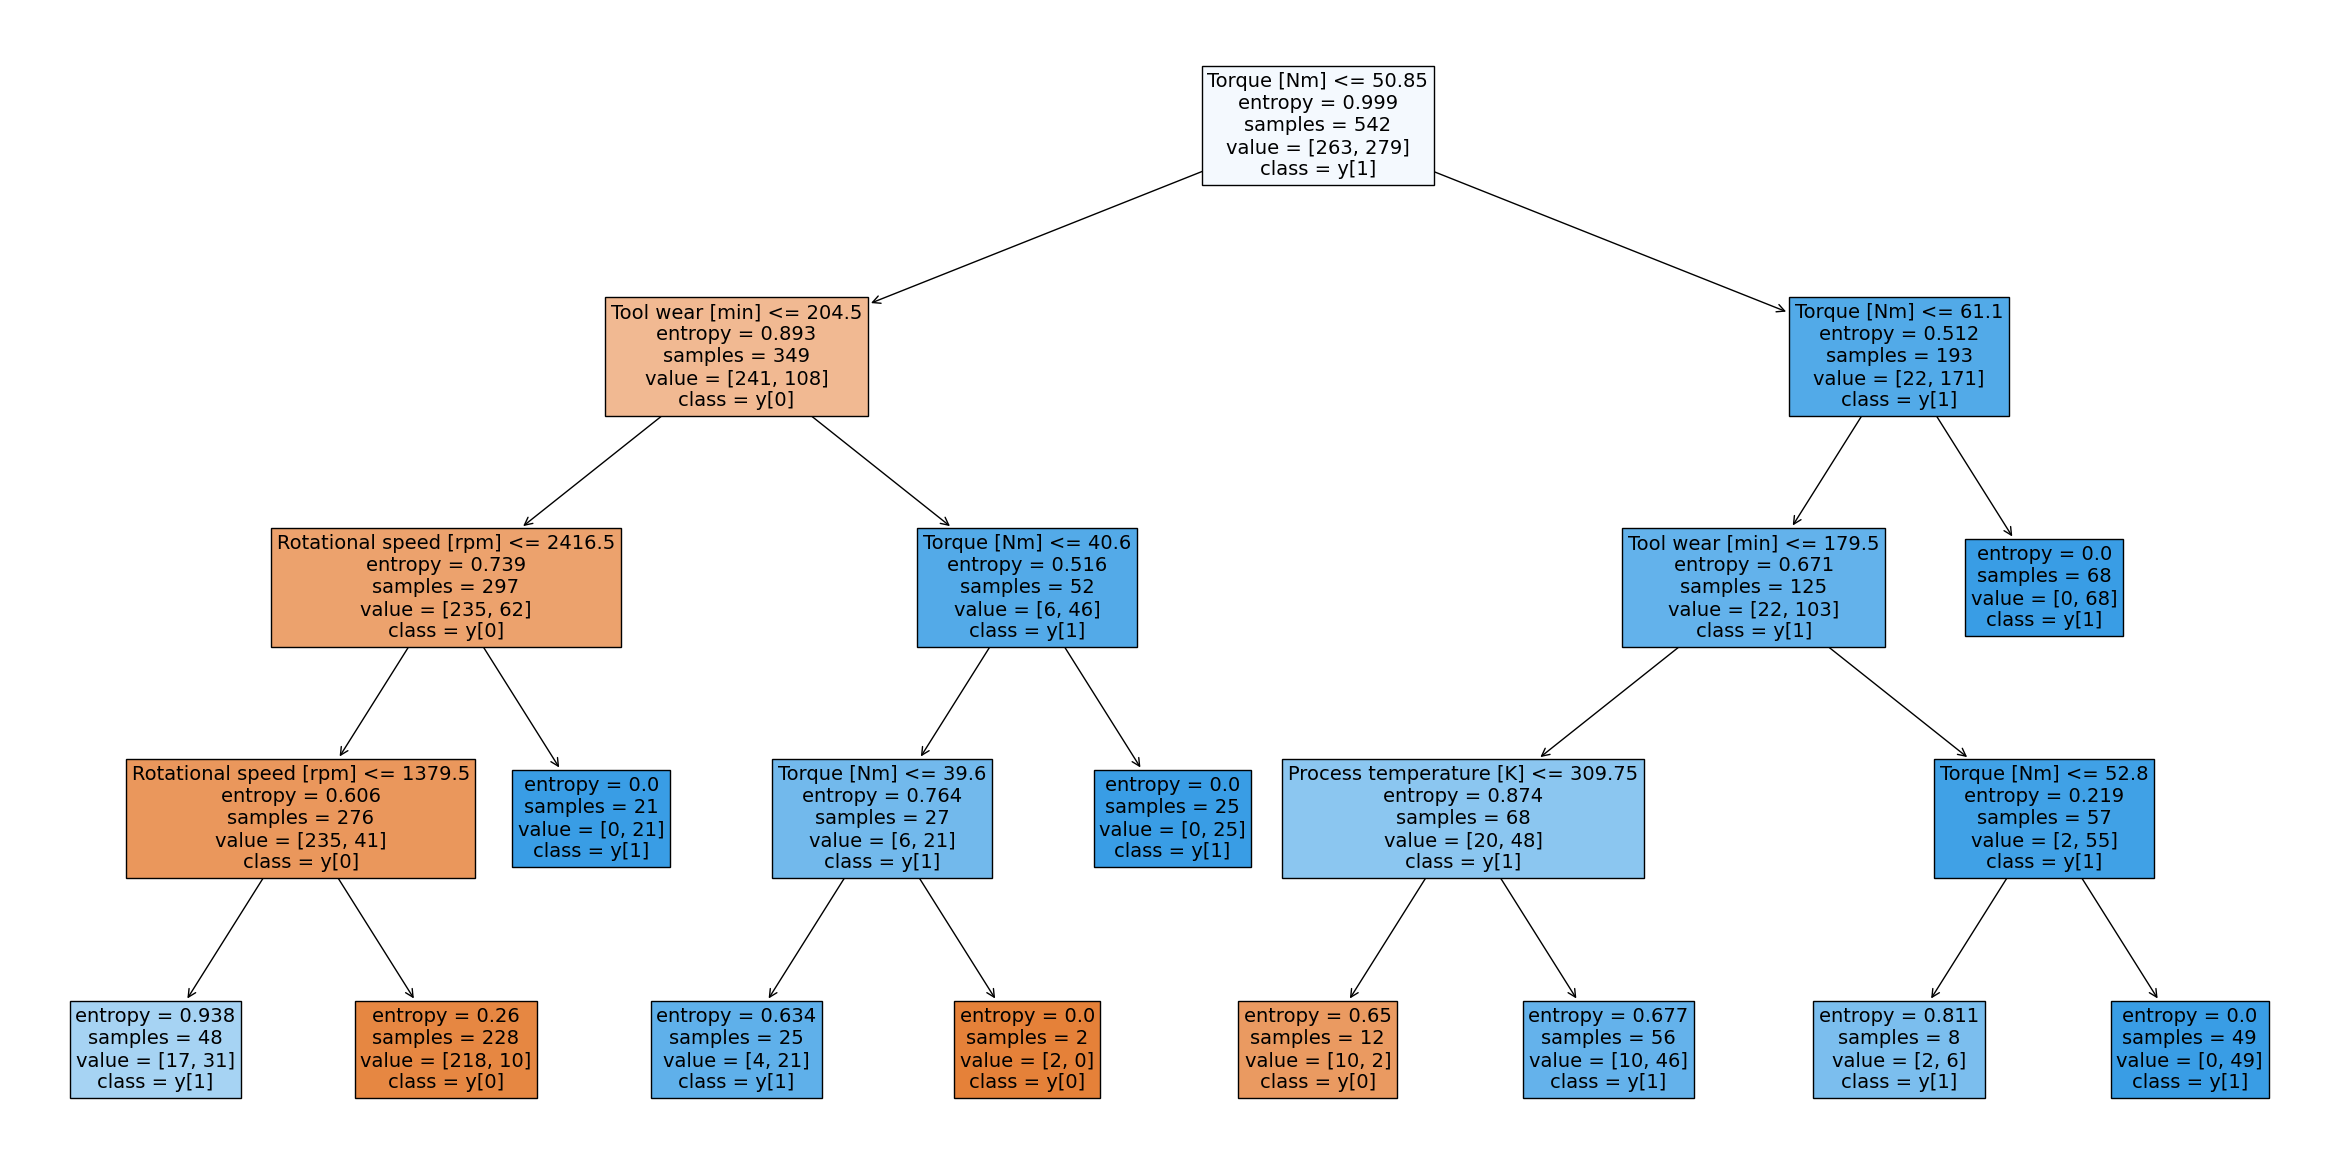

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a target variable named "Machine failure" in ndata
y = ndata["Machine failure"]  # Target
X = ndata.drop(columns=["TWF", "HDF", "PWF", "OSF", "RNF", "Machine failure"])

# Store the column names before dropping them
feature_names = X.columns.tolist()

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree model with max_depth parameter for pruning
dt_model_pruned = DecisionTreeClassifier(max_depth=4, criterion="entropy",random_state=42)

# Train the pruned model on the training data
dt_model_pruned.fit(X_train, y_train)

# Predict on the testing data using pruned model
y_pred_dt_pruned = dt_model_pruned.predict(X_test)

# Evaluate the pruned model
accuracy_dt_pruned = accuracy_score(y_test, y_pred_dt_pruned)
print("Pruned Decision Tree Accuracy:", accuracy_dt_pruned)

# Print classification report for pruned model
print("Pruned Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_pruned))


# Alternatively, save the plot to a file with reduced dpi
plt.figure(figsize=(30, 15))
plot_tree(dt_model_pruned, filled=True, feature_names=feature_names, class_names=True, fontsize=14)  # Adjust fontsize as needed
plt.savefig("pruned_decision_tree.png", dpi=10, bbox_inches="tight")  # Adjust dpi as needed
plt.show()

